In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sn

In [ ]:
df=pd.read_csv(r'/content/customerdata.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# data preprocessing

In [ ]:
null_percent = df.isnull().sum()/len(df)
null_percent = null_percent[null_percent !=0] * 100
null_percent

workclass         1.971664
occupation        1.977806
native-country    0.560993
dtype: float64

In [ ]:
x=df[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
y=df[['income']]

In [ ]:
#change ? as null values
x.replace('?', pd.NA, inplace=True)

In [ ]:
x.shape

(48842, 14)

In [ ]:
x.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

In [ ]:
null_percent = x.isnull().sum()/len(df)
null_percent = null_percent[null_percent !=0] * 100
null_percent

workclass         5.730724
occupation        5.751198
native-country    1.754637
dtype: float64

In [ ]:
#drop null values in x and y
x = x.dropna()
y = y.iloc[list(x.index.values), :]

In [ ]:
x['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [ ]:
x["education"].replace("Preschool", "Not-HS-grad", inplace=True)
x["education"].replace("1st-4th", "Not-HS-grad", inplace=True)
x["education"].replace("5th-6th", "Not-HS-grad", inplace=True)
x["education"].replace("7th-8th", "Not-HS-grad", inplace=True)
x["education"].replace("9th", "Not-HS-grad", inplace=True)
x["education"].replace("10th", "Not-HS-grad", inplace=True)
x["education"].replace("11th", "Not-HS-grad", inplace=True)
x["education"].replace("12th", "Not-HS-grad", inplace=True)
x["education"].replace("Assoc-acdm", "Some-college", inplace=True)
x["education"].replace("Assoc-voc", "Some-college", inplace=True)

In [ ]:
x['education'].unique()

array(['Bachelors', 'HS-grad', 'Not-HS-grad', 'Masters', 'Some-college',
       'Doctorate', 'Prof-school'], dtype=object)

In [ ]:
x['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [ ]:
x["marital-status"].replace("Married-civ-spouse", "Married", inplace=True)
x["marital-status"].replace("Married-AF-spouse", "Married", inplace=True)
x["marital-status"].replace("Divorced", "Separated", inplace=True)

In [ ]:
x['marital-status'].unique()

array(['Never-married', 'Married', 'Separated', 'Married-spouse-absent',
       'Widowed'], dtype=object)

# encoding

In [ ]:
y['income'].value_counts()

<=50K     22654
<=50K.    11360
>50K       7508
>50K.      3700
Name: income, dtype: int64

In [ ]:
income_mapping={">50K":1, "<=50K":0,">50K.":1, "<=50K.":0}
y['income']=y["income"].replace(income_mapping)

In [ ]:
y['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [ ]:
x_0 = x.copy()
x_0 = x_0.apply(LabelEncoder().fit_transform)

# train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_0, y, test_size=0.2,)

# Decison Tree

In [ ]:
dct = DecisionTreeClassifier(max_depth=10)
model1 = dct.fit(X_train,y_train)
preds1 = model1.predict(X_test)

In [ ]:
round(dct.score(X_test,y_test),6)

0.847761

In [ ]:
cm = confusion_matrix(y_test,preds1)
cm

array([[6212,  621],
       [ 756, 1456]])

Text(58.222222222222214, 0.5, 'Truth')

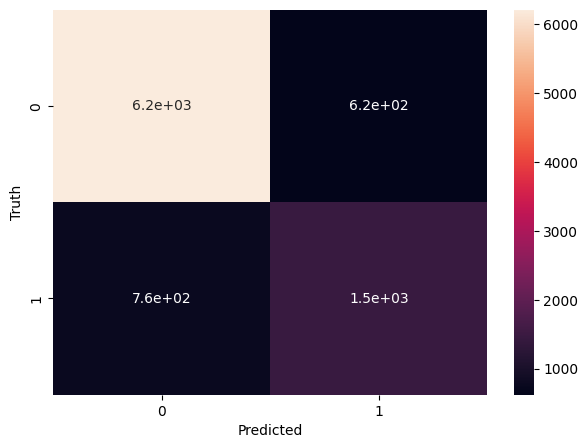

In [ ]:
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

[Text(0.6263089484475688, 0.9545454545454546, 'x[5] <= 0.5\ngini = 0.374\nsamples = 36177\nvalue = [27181, 8996]'),
 Text(0.3631370826010545, 0.8636363636363636, 'x[4] <= 10.5\ngini = 0.496\nsamples = 16879\nvalue = [9203, 7676]'),
 Text(0.23520796719390744, 0.7727272727272727, 'x[10] <= 79.0\ngini = 0.442\nsamples = 11343\nvalue = [7596, 3747]'),
 Text(0.15582893966022263, 0.6818181818181818, 'x[4] <= 7.5\ngini = 0.418\nsamples = 10794\nvalue = [7583, 3211]'),
 Text(0.070298769771529, 0.5909090909090909, 'x[12] <= 42.5\ngini = 0.192\nsamples = 1835\nvalue = [1638, 197]'),
 Text(0.04452255418863503, 0.5, 'x[0] <= 20.5\ngini = 0.144\nsamples = 1380\nvalue = [1272, 108]'),
 Text(0.026362038664323375, 0.4090909090909091, 'x[6] <= 11.5\ngini = 0.069\nsamples = 474\nvalue = [457, 17]'),
 Text(0.012888107791446984, 0.3181818181818182, 'x[6] <= 2.5\ngini = 0.053\nsamples = 437\nvalue = [425, 12]'),
 Text(0.0046865846514352666, 0.22727272727272727, 'x[8] <= 1.5\ngini = 0.107\nsamples = 159\nva

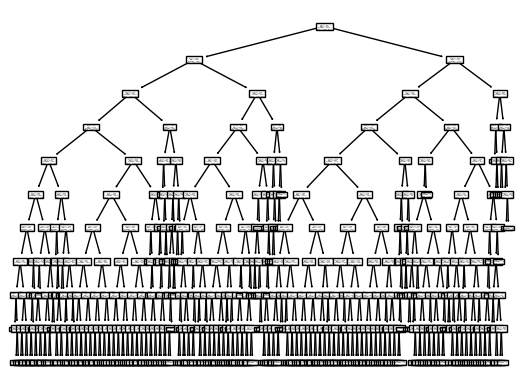

In [ ]:
tree.plot_tree(model1)

# Random Forest

In [ ]:
rfc = RandomForestClassifier()
model2 = rfc.fit(X_train, y_train)
pred2 = model2.predict(X_test)

In [ ]:
round(rfc.score(X_test,y_test),6)

0.857048

In [ ]:
cm1 = confusion_matrix(y_test,pred2)
cm1

array([[6344,  489],
       [ 804, 1408]])

Text(58.222222222222214, 0.5, 'Truth')

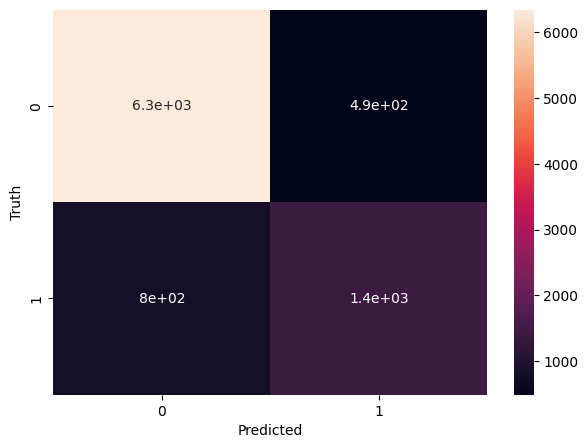

In [ ]:
plt.figure(figsize=(7,5))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# KNN

In [ ]:
knn = KNeighborsClassifier()
model3 = knn.fit(X_train, y_train)
pred3 = model3.predict(X_test)

In [ ]:
round(knn.score(X_test,y_test),6)

0.77037

In [ ]:
cm2 = confusion_matrix(y_test,pred3)
cm2

array([[6130,  703],
       [1374,  838]])

Text(58.222222222222214, 0.5, 'Truth')

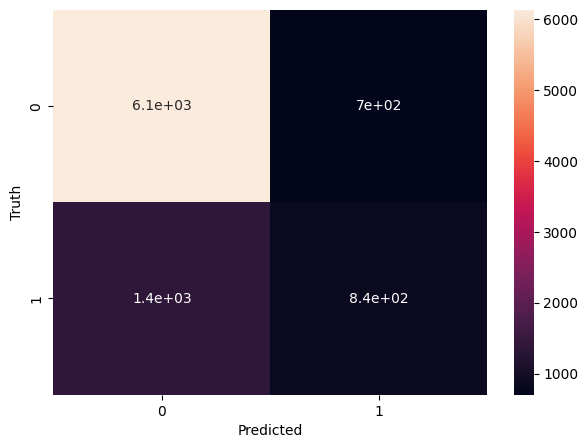

In [ ]:
plt.figure(figsize=(7,5))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# kmeans

In [180]:
newdf=X_train[['hours-per-week','age']]

In [181]:
km = KMeans(n_clusters=2)
yp = km.fit_predict(newdf)
yp

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [182]:
newdf["predicted"]=yp

In [183]:
df1 = newdf[newdf.predicted==0]
df2 = newdf[newdf.predicted==1]

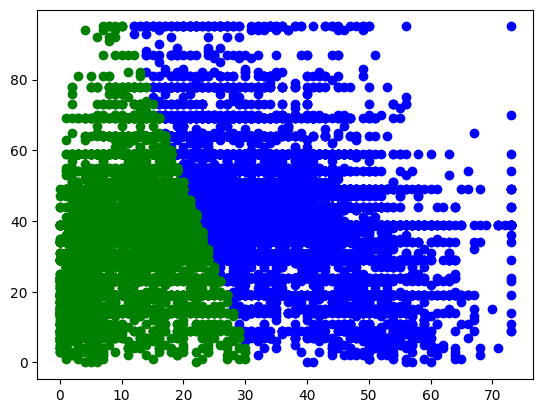

In [184]:
plt.scatter(df1['age'],df1['hours-per-week'],color='blue')
plt.scatter(df2['age'],df2['hours-per-week'],color='green')

In [185]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(newdf)
    sse.append(km.inertia_)

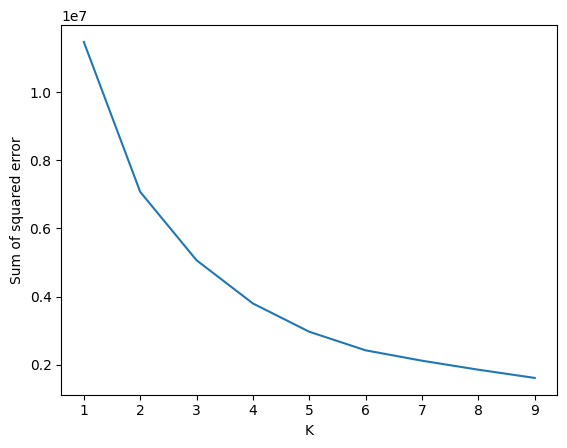

In [186]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# svc

In [ ]:
svc = SVC()
model5 = svc.fit(X_train,y_train)
pred5 = model5.predict(X_test)

In [ ]:
round(svc.score(X_test,y_test),6)

0.755445